In [131]:
#Assignment_6 MLR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("D:/Assignments/MLR\MLR/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [13]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [15]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [21]:
df.duplicated().sum()

1

In [35]:
df_1 = df.drop_duplicates(ignore_index=True)
df_1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


<Axes: >

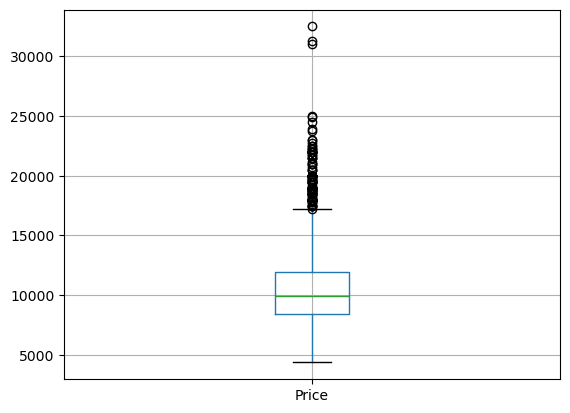

In [41]:
df_1.boxplot('Price')

In [39]:
df_1[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.575869
Weight,0.575869,1.000000


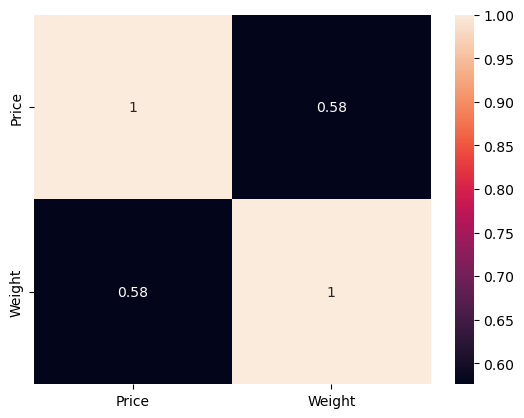

In [53]:
sns.heatmap(df_1[['Price','Weight']].corr(),annot=True)
plt.show()

In [57]:
label_encoder=LabelEncoder()
df_1['Fuel_Type']=label_encoder.fit_transform(df_1['Fuel_Type'])
df_1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,2,86,0,1300,3,4,5,1025
1431,10845,72,19000,2,86,0,1300,3,4,5,1015
1432,8500,71,17016,2,86,0,1300,3,4,5,1015
1433,7250,70,16916,2,86,0,1300,3,4,5,1015


In [67]:
#perparing model
target=df_1[['Price']]
features=df_1.drop('Price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1148, 10)
(1148, 1)
(287, 10)
(287, 1)


In [69]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [139]:
y_pred=linear_model.predict(x_test)
print(list(y_pred))

[array([15542.62555409]), array([10795.00465001]), array([13121.14886739]), array([10471.29701081]), array([8059.24993951]), array([9484.92082893]), array([13895.11035986]), array([6392.05054479]), array([13278.78914353]), array([8487.15330411]), array([13250.37560992]), array([7743.19431421]), array([11526.23520905]), array([5001.18363973]), array([18082.98097044]), array([8297.25467271]), array([13567.20064033]), array([15555.1406489]), array([16633.93885677]), array([9369.18652309]), array([12436.20906731]), array([10838.29480074]), array([10870.59653511]), array([11879.29740799]), array([8315.44486122]), array([8290.58158432]), array([9812.63806864]), array([8449.38280687]), array([9450.70618018]), array([8070.2821265]), array([9088.08901167]), array([12020.70509149]), array([6557.66900243]), array([19087.60517921]), array([9480.02273032]), array([9438.4901857]), array([7186.42954035]), array([8087.33601898]), array([14178.41596104]), array([10673.41201977]), array([7670.48529843])

In [79]:
linear_model.score(x_train,y_train)

0.8626130385692874

In [81]:
linear_model.score(x_test,y_test)

0.8671580177926694

In [83]:
linear_model.intercept_

array([-8689.50713129])

In [85]:
linear_model.coef_

array([[-1.24537995e+02, -1.76276977e-02,  3.95421517e+02,
         2.62373819e+01,  3.94335343e+02, -3.00403510e-02,
         4.30425267e+00,  1.10844667e-12,  7.33844905e+02,
         1.91383362e+01]])

In [89]:
r2_score(y_test,y_pred)

0.8671580177926694

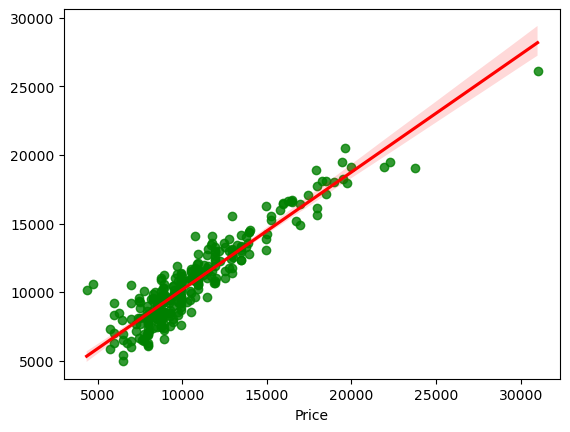

In [93]:
sns.regplot(data=df_1,x=y_test,y=y_pred,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.show()

In [101]:
# by using statsmodel
model1=smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+cc+Doors+Gears+Weight',data=df_1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1127.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:07:23   Log-Likelihood:                -12362.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1426   BIC:                         2.479e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9852.8426   1478.988     -6.662      0.000   -1.28e+04   -6951.617
Age_08_04   -123.2082      2.608    -47.237      0.000    -128.325    -118.092
KM            -0.0177      0.001    -13.494      0.000      -0.020      -0.015
Fuel_Type    617.0386    145.592      4.238      0.000     331.441     902.637
HP            23.2994      2.872      8.114      0.000      17.666      28.932
cc            -0.0418      0.090     -0.465      0.642      -0.218       0.134
Doors        -35.7894     40.222     -0.890      0.374    -114.690      43.112
Gears        582.2973    196.381      2.965      0.003     197.070     967.525
Weight        20.9344      1.014     20.653      0.000      18.946      22.923
==============================================================================
Omnibus:                      270.225   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2870.669
Skew:                          -0.545   Prob(JB):                         0.00
Kurtosis:                       9.843   Cond. No.                     3.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
model2=smf.ols('Price~cc',data=df_1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.29e-06
Time:                        16:09:14   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model3=smf.ols('Price~Doors',data=df_1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.40e-12
Time:                        16:14:00   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
model4.resid.mean()

2.4483724130570683e-10

In [115]:
model4.resid_pearson

array([ 0.86893322,  0.93980501,  0.99650243, ..., -0.36201304,
       -0.71637196, -1.25685978])

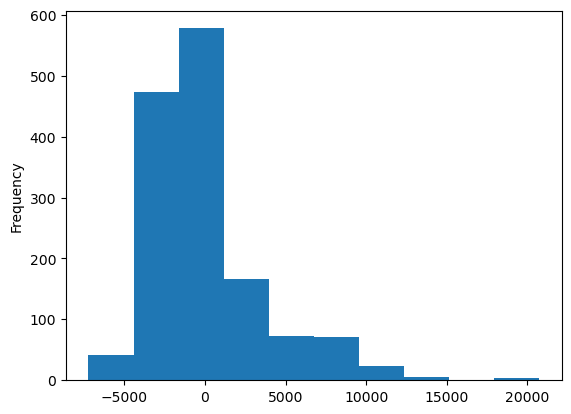

In [127]:
model4.resid.plot(kind='hist')
plt.show()

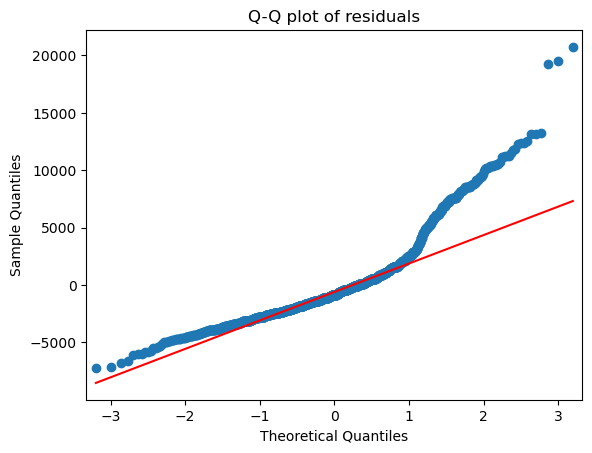

In [119]:
import statsmodels.api as sm
qqplot=sm.qqplot(model4.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

In [133]:
#applying lasso,ridge method
lasso=Lasso(alpha=2)
lasso.fit(x_train,y_train)

Lasso(alpha=2)

In [143]:
y_pred=lasso.predict(x_test)
print(list(y_pred))

[15535.333577272959, 10798.602782091144, 13128.651824229197, 10472.982596724283, 8061.216658222578, 9451.621493654162, 13895.880235013712, 6388.124454338264, 13277.778847491107, 8485.994351300971, 13260.726380169726, 7699.817632169481, 11528.346081864602, 4984.882433796451, 18084.636571310508, 8308.829697441746, 13565.866373804158, 15560.494975509355, 16637.2487399246, 9382.75511014305, 12445.051929291061, 10780.376759059625, 10879.215826207652, 11884.320812688682, 8321.494610638925, 8283.939395240403, 9824.641073731771, 8456.443993595589, 9460.659530266152, 8081.3871620457285, 9085.440946703911, 12026.705100856958, 6561.783656069041, 19086.03847220722, 9490.957480962406, 9448.374355435564, 7192.854798280152, 8083.067237882451, 14177.52871051199, 10680.01531916259, 7682.667117412882, 8011.843691896554, 9803.829162231137, 13882.961497796401, 8496.561719729678, 9230.524621827393, 12564.845468358937, 6898.986166730048, 11006.068425471061, 12815.660950633526, 10054.196405518687, 12895.0584

In [145]:
#r2 score
r2_score(y_test,y_pred)

0.8672128573315887

In [147]:
lasso.intercept_

array([-8286.44378335])

In [149]:
lasso.coef_

array([-1.24427888e+02, -1.77275250e-02,  3.71285103e+02,  2.66341196e+01,
        3.51346244e+02, -2.99874423e-02,  0.00000000e+00,  0.00000000e+00,
        6.66925493e+02,  1.90995146e+01])

In [151]:
params={'alpha':[1,2,3,4,5,6]}
grid_search=GridSearchCV(lasso,params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=2), param_grid={'alpha': [1, 2, 3, 4, 5, 6]})

In [153]:
grid_search.best_params_

{'alpha': 6}

In [157]:
lasso1=Lasso(alpha=6)
lasso1.fit(x_train,y_train)

Lasso(alpha=6)

In [161]:
y_pred1=lasso1.predict(x_test)
print(list(y_pred1))

[15526.248586169091, 10813.394474020522, 13137.41411111956, 10483.898261400023, 8072.33117302511, 9386.198575958824, 13904.739786435854, 6386.6822683872215, 13282.487582890688, 8489.839561922201, 13272.737956771056, 7617.332588675212, 11539.695514474988, 4960.9023328402745, 18095.645083327618, 8323.477310196218, 13572.255081696454, 15560.674213426122, 16633.074251231144, 9401.76798122584, 12454.30559568475, 10663.653633335562, 10890.261607866578, 11903.356204764106, 8323.94032090749, 8281.001938774778, 9840.298373530277, 8477.917526526988, 9471.87052614617, 8095.007102980735, 9086.104598691865, 12039.906879349906, 6564.476055954392, 19087.153057548552, 9504.289295801791, 9459.435278813362, 7206.429894108442, 8081.5248761149705, 14182.825978218414, 10694.171691761865, 7698.317561921345, 8026.364814947516, 9823.038636126821, 13893.108951493577, 8494.470895239576, 9234.711285345937, 12576.6015585512, 6889.634724058986, 11011.749500000366, 12827.792837709374, 10074.408600647293, 12895.0034

In [163]:
r2_score(y_test,y_pred)

0.8672128573315887

In [165]:
#applying ridge method
ridge=Ridge()
params={'alpha':[1,2,3,4,5]}
grid_search=GridSearchCV(ridge,params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1, 2, 3, 4, 5]})

In [167]:
grid_search.best_params_

{'alpha': 5}

In [169]:
ridge=Ridge(alpha=5)
ridge.fit(x_train,y_train)

Ridge(alpha=5)

In [171]:
y_pred=ridge.predict(x_test)
print(list(y_pred))

[array([15537.36894727]), array([10799.65439913]), array([13126.77157123]), array([10474.81670742]), array([8063.09380891]), array([9457.74254083]), array([13897.74650441]), array([6388.89177058]), array([13280.31834694]), array([8488.92477436]), array([13259.95072944]), array([7705.73368854]), array([11529.85539183]), array([4989.68165119]), array([18085.84219858]), array([8308.02664543]), array([13566.24127883]), array([15558.60694186]), array([16636.04094327]), array([9381.12179657]), array([12444.98727408]), array([10758.06665715]), array([10877.09474767]), array([11880.83135846]), array([8322.71634433]), array([8284.86559612]), array([9823.55874852]), array([8456.43120959]), array([9460.37264508]), array([8080.77782376]), array([9088.88136331]), array([12027.49743552]), array([6559.71343184]), array([19087.91591327]), array([9490.30104716]), array([9448.1143181]), array([7193.82665065]), array([8083.91225755]), array([14179.99281306]), array([10680.64644313]), array([7681.64490451

In [173]:
r2_score(y_test,y_pred)

0.8672494084856515

In [175]:
ridge.coef_

array([[-1.24459301e+02, -1.76887835e-02,  3.75990013e+02,
         2.66707636e+01,  3.58197632e+02, -3.00276827e-02,
         1.24675635e+00,  0.00000000e+00,  6.44721526e+02,
         1.91042643e+01]])

In [177]:
ridge.intercept_

array([-8198.6517118])

# Interview Questions:


# 1.What is Normalization & Standardization and how is it helpful? 
+ Normalization in data-science refers to the process of scalling numeric features to a common range,typically between 0 and 1. The goal of normalization is to bring all the features into a similer scale,which is perticularly important for algorithms that are sensitive to the scale of the features

+ Standardization in data-science refers to the process of transforming data in such a way that it has mean of 0 and standard deviation of 1. This process is also known as z-score normalization

# 2.What techniques can be used to address multicollinearity in multiple linear regression?
+ Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. This can cause issues in multiple linear regression, such as unstable coefficients estimates and difficulties in interpreting the importance of individual predictors.